In [7]:
import pandas as pd 
import glob # a module that finds all the pathnames matching a specified pattern
import numpy as np
import pymysql
import re

# Read the files in the folder

In [155]:
file_path =r'/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects'

In [156]:
all_csv_Files = glob.glob(file_path + "/*.csv")
all_excel_Files = glob.glob(file_path + "/*.xlsx")
print(all_csv_Files)
print(all_excel_Files)

['/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects/HS.csv', '/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects/HS2.csv']
['/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects/HS2.xlsx']


In [157]:
for file in all_csv_Files:
    df = pd.read_csv(file,encoding='latin1')
    print(df.head())
    print('\n')
# the data are not meesy in the csv files

  Geographic Area           City percent_completed_hs
0              AL  Anniston city                 79.8
1              AL      Arab city                 87.6
2              AL   Ardmore town                 77.7
3              AL      Argo town                 87.5
4              AL    Ariton town                 71.3


  Geographic Area           City percent_completed_hs
0              AL  Anniston city                 79.8
1              AL      Arab city                 87.6
2              AL   Ardmore town                 77.7
3              AL      Argo town                 87.5
4              AL    Ariton town                 71.3




In [158]:
for file in all_excel_Files:
    df = pd.read_excel(file)
    print(df.head())
    print('\n')
    
# the data in excel files are pretty messy. a lot of null values and the column names are wrong.

   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3       Unnamed: 4  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         NaN         NaN         NaN         NaN              NaN   
3         NaN         NaN         NaN         NaN  Geographic Area   
4         NaN         NaN         NaN         NaN               AL   

      Unnamed: 5            Unnamed: 6  
0            NaN                   NaN  
1            NaN                   NaN  
2            NaN                   NaN  
3           City  percent_completed_hs  
4  Anniston city                  79.8  




# For convenience's sake, I will just work on the xlsx file. 


In [250]:
# for single file
df = pd.read_excel('/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects/HS2.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Geographic Area,City,percent_completed_hs
4,NaN,NaN,NaN,NaN,AL,Anniston city,79.8


In [251]:
#drop the columns and rows that contain all null values
df.dropna(how='all',axis=1, inplace=True)
df.dropna(how='all',axis=0, inplace=True)
df.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,Geographic Area,City,percent_completed_hs
4,AL,Anniston city,79.8
5,AL,Arab city,87.6
6,AL,Ardmore town,77.7
7,AL,Argo town,87.5


In [252]:
# set the first row as the column names
# using .values to prevent extracting the index 3
header= df.iloc[0].values 

# remove the first row since it will be used as the column names
df = df[1:]

# set the new column names
df.columns = header

# reset the idex and drop the original one.
df=df.reset_index(drop=True)
df.head()

,Geographic Area,City,percent_completed_hs
0,AL,Anniston city,79.8
1,AL,Arab city,87.6
2,AL,Ardmore town,77.7
3,AL,Argo town,87.5
4,AL,Ariton town,71.3


In [253]:
# check to see if there are missing values in either of the columns.
df.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [254]:
df.info()

# the data type for percent_completed_hs shold be float type, not str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29315 entries, 0 to 29314
Data columns (total 3 columns):
Geographic Area         29315 non-null object
City                    29315 non-null object
percent_completed_hs    29315 non-null object
dtypes: object(3)
memory usage: 687.1+ KB


In [260]:
# remove the special char in each value. if the value is empty or any other char, replace it with empty str
# only keep values that between 0-9 and '.'.
import re
for i in range(len(df['percent_completed_hs'])):
    df['percent_completed_hs'][i] = re.sub('[^0-9.]','', df['percent_completed_hs'][i])

In [261]:
df.head()

,Geographic Area,City,percent_completed_hs
0,AL,Anniston city,79.8
1,AL,Arab city,87.6
2,AL,Ardmore town,77.7
3,AL,Argo town,87.5
4,AL,Ariton town,71.3


In [262]:
# After the above code, values that do not contain numbers but others should be just an empty cell now. 
# but they could be converted into float. 
a=0
for i in df['percent_completed_hs']:
    if i=='':
        a+=1
print(a)
a=0

# 197 values with an empty str

197


In [263]:
# Set all those empty values to 0
for i in range(len(df['percent_completed_hs'])):
               if df['percent_completed_hs'][i]=='':
                    df['percent_completed_hs'][i] = 0

In [264]:
# convert the column to float data type
df['percent_completed_hs'] = [float(x) for x in df['percent_completed_hs']]

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29315 entries, 0 to 29314
Data columns (total 3 columns):
Geographic Area         29315 non-null object
City                    29315 non-null object
percent_completed_hs    29315 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.1+ KB


In [266]:
df.isnull().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

# Establish the connection with MySQL Server

In [268]:
import pymysql
conn = pymysql.connect(host='localhost', user='root', password='1125', db='just trying') 
cursor = conn.cursor()

# Get the column names to be used in the query

In [205]:
# get all the column name from the database

query = 'SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_SCHEMA="just trying" AND TABLE_NAME="frompy";'
cursor.execute(query)
data = cursor.fetchall()
for i in data:
    print(*i, end=' ')
    
# now you can just copy the column names and use it.

id Geographic Area City percent_completed_hs 

In [204]:
# or just get it from df
print(*df.columns)

Geographic Area City percent_completed_hs


# Load the data


In [269]:
# need to convert the df to an array list for the below loading method
df2 = df.values
df2[0:5]

array([['AL', 'Anniston city', 79.8],
       ['AL', 'Arab city', 87.6],
       ['AL', 'Ardmore town', 77.7],
       ['AL', 'Argo town', 87.5],
       ['AL', 'Ariton town', 71.3]], dtype=object)

In [ ]:
for i in df2:
    cursor.execute('insert into frompy (`Geographic Area`, City, percent_completed_hs)''values("%s", "%s", "%s")', [*i])
conn.commit()

# it worked. :)
# this method worked and its pretty efficient. However, the data loaded into the database has the char ' in all thr str
# data types. 

# The data are successfuly loaded into MySQL database, but the texts all contain the single quotation mark.

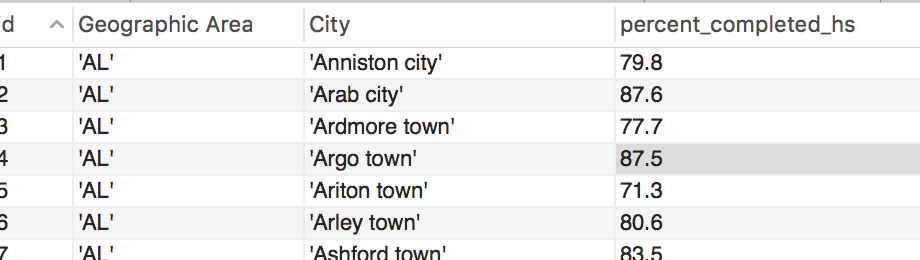

In [279]:
# Actual table in MySQl database
from IPython.display import Image
Image("a.png")

# Update: Problem solved by setting the query as a variable and remove the quotation marks.

In [ ]:
query = 'insert into frompy (`Geographic Area`, City, percent_completed_hs)''values(%s, %s, %s)'

In [ ]:
for i in df2:
    cursor.execute(query, [*i])
conn.commit()

# Pull the data from MySQL Database

In [280]:
query = 'select * from frompy;'
cursor.execute(query)
data = cursor.fetchall()
a=0
for i in data:
    print(i)
    a+=1
    if(a==10):
        break
        
# select the column names after pull the data from MySQL        
print('\n')
field_name = [field[0] for field in cursor.description]
print(*field_name)

(1, "'AL'", "'Anniston city'", 79.8)
(2, "'AL'", "'Arab city'", 87.6)
(3, "'AL'", "'Ardmore town'", 77.7)
(4, "'AL'", "'Argo town'", 87.5)
(5, "'AL'", "'Ariton town'", 71.3)
(6, "'AL'", "'Arley town'", 80.6)
(7, "'AL'", "'Ashford town'", 83.5)
(8, "'AL'", "'Ashland town'", 77.9)
(9, "'AL'", "'Ashville city'", 77.6)
(10, "'AL'", "'Athens city'", 83.4)


id Geographic Area City percent_completed_hs


# Convert the data into a 2d list.

In [294]:
data2=[list(x) for x in data]
data2[0:10]

[[1, "'AL'", "'Anniston city'", 79.8],
 [2, "'AL'", "'Arab city'", 87.6],
 [3, "'AL'", "'Ardmore town'", 77.7],
 [4, "'AL'", "'Argo town'", 87.5],
 [5, "'AL'", "'Ariton town'", 71.3],
 [6, "'AL'", "'Arley town'", 80.6],
 [7, "'AL'", "'Ashford town'", 83.5],
 [8, "'AL'", "'Ashland town'", 77.9],
 [9, "'AL'", "'Ashville city'", 77.6],
 [10, "'AL'", "'Athens city'", 83.4]]

# Remove all the single quotation mark

In [297]:
import re
for i in range(len(data2)):
    for j in range(1,3):
        data2[i][j]= re.sub('[^a-z A-Z.0-9]','', data2[i][j])


# Create a dataframe to display the data

In [298]:
df2 = pd.DataFrame(data2, columns=field_name)
df2.head()

,id,Geographic Area,City,percent_completed_hs
0,1,AL,Anniston city,79.8
1,2,AL,Arab city,87.6
2,3,AL,Ardmore town,77.7
3,4,AL,Argo town,87.5
4,5,AL,Ariton town,71.3


In [299]:
df2.drop(columns='id', inplace =True)
df2.head()

,Geographic Area,City,percent_completed_hs
0,AL,Anniston city,79.8
1,AL,Arab city,87.6
2,AL,Ardmore town,77.7
3,AL,Argo town,87.5
4,AL,Ariton town,71.3


In [300]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175891 entries, 0 to 175890
Data columns (total 3 columns):
Geographic Area         175891 non-null object
City                    175891 non-null object
percent_completed_hs    175891 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.0+ MB


In [820]:
cursor.close()
conn.close()

# In a nutshell

In [9]:
file_path =r'/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects'
all_excel_Files = glob.glob(file_path + "/*.xlsx")
print(all_excel_Files)

query = 'insert into frompy (`Geographic Area`, City, percent_completed_hs)' 'values(%s, %s, %s)'
 
conn = pymysql.connect(host='localhost', user='root', password='1125', db='just trying') 
cursor = conn.cursor() 


['/Users/michaelzeng/Library/Mobile Documents/com~apple~CloudDocs/python projects/HS2.xlsx']


In [10]:
for file in all_excel_Files:
    print('Display the data')
    df = pd.read_excel(file,encoding='latin1')
    print(df.head())
    print('\n')

    # drop columns and rows that contain only null values
    print('Drop the columns and rows contain entirely null values')
    df = df.dropna(how='all', axis=1)
    df = df.dropna(how='all', axis=0)
    print(df.head())
    print('\n')
    
    # the first row contains the name of each column
    print('Set the first row as the colmns name and then reset the index')
    header= df.iloc[0].values 
    
    # Since the first row will be used as the column name, so remove them.
    df = df[1:]
    
    # set the new column name
    df.columns = header
    
    # reset the index
    df = df.reset_index(drop=True)
    print(df.head())
    print('\n')
    df['percent_completed_hs'] = [str(x) for x in df['percent_completed_hs']]
    print('Remove everything except 0-9 and "." ')
    for i in range(len(df['percent_completed_hs'])):
        df['percent_completed_hs'][i] = re.sub('[^0-9.]','', df['percent_completed_hs'][i])
    print('\n')

    print('Replace the empty srtrings with 0')
    for i in range(len(df['percent_completed_hs'])):
               if df['percent_completed_hs'][i]=='':
                    df['percent_completed_hs'][i] = 0
    print('\n')  
    
    print('Convert the column to float data type')
    df['percent_completed_hs'] = [float(x) for x in df['percent_completed_hs']]
    print('\n')  
    
    print(df.info())
    print('\n')  

    print('Convert the df into array so it can be loaded in to the database')
    df2 = df.values
    print('\n')  
    
    print('Start loading the data into MySQl database')  
    try:
        for i in df2:
            cursor.execute(query, [*i])
        conn.commit()
        print('Data loaded successfully')
        print('\n')  
    except:
        print('An error occured.')
        print('\n')  
    
    print('\n')  
    print('Connection now terminated.')
    cursor.close()
    conn.close()

Display the data
   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3       Unnamed: 4  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         NaN         NaN         NaN         NaN              NaN   
3         NaN         NaN         NaN         NaN  Geographic Area   
4         NaN         NaN         NaN         NaN               AL   

      Unnamed: 5            Unnamed: 6  
0            NaN                   NaN  
1            NaN                   NaN  
2            NaN                   NaN  
3           City  percent_completed_hs  
4  Anniston city                  79.8  


Drop the columns and rows contain entirely null values
        Unnamed: 4     Unnamed: 5            Unnamed: 6
3  Geographic Area           City  percent_completed_hs
4               AL  Anniston city                  79.8
5               AL      Arab city                  87.6
6               AL   Ardmore town  